In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [122]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [123]:
df.duplicated().sum()

0

In [124]:
df.shape

(1303, 12)

There are 1303 row and 12 col


In [125]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [126]:
df["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 1300, 1301, 1302], dtype=int64)

'Unnamed: 0' col is only index col so i droped it..


In [127]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [128]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [129]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [131]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

1. No any Missing value are present in our Dataset.
2. Only Inches and Price are numerical feature so, they required more EDA and Feature Enginnering on Rest Feature
3. No Duplicate Value in My Dataset


<Axes: xlabel='Price', ylabel='Density'>

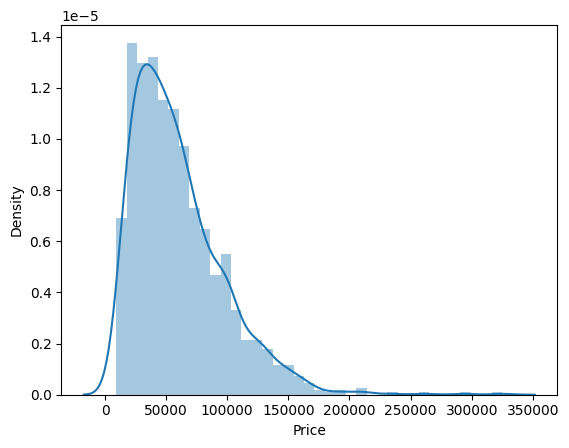

In [132]:
sns.distplot(df["Price"])

Last Task of Feature Engineering.

Price is skwed to high range so they requid feature scaling to normal distribution


Next Task:

Start by looking at each category one by one. Check how much each category is related to our main target, which is the price. If it's strongly related, make some changes to that category (feature engineering) and then check the connection again. If the connection isn't strong, think about removing that category.


In [133]:
col_cat = []
for (
    dt,
    col,
) in zip(df.dtypes, df.columns):
    if dt == "object":
        col_cat.append(col)

In [134]:
col_cat[0]

'Company'

([<matplotlib.patches.Wedge at 0x205a4cead50>,
 [Text(0.829822766601291, 0.7220762951587454, 'Dell'),
  Text(-0.600473952880243, 0.9216458278060916, 'Lenovo'),
  Text(-1.0201559157049263, -0.4114388261360901, 'HP'),
  Text(-0.15988660369504512, -1.0883180941061597, 'Asus'),
  Text(0.5112858764640984, -0.9739541839985795, 'Acer'),
  Text(0.8350239477891138, -0.7160551700942347, 'MSI'),
  Text(0.9842272276093483, -0.4912196702417527, 'Toshiba'),
  Text(1.0519826264870844, -0.3214538124977452, 'Apple'),
  Text(1.0724628575248791, -0.2445882647012548, 'Samsung'),
  Text(1.0810980320765913, -0.2030444410470818, 'Razer'),
  Text(1.087334592774128, -0.16644363417301697, 'Mediacom'),
  Text(1.0920166140255518, -0.1322864871865946, 'Microsoft'),
  Text(1.0948884057567883, -0.10592156975497934, 'Xiaomi'),
  Text(1.0967276676445268, -0.08478456830695258, 'Vero'),
  Text(1.0980023416115576, -0.06626354816591451, 'Chuwi'),
  Text(1.0988460056887228, -0.050373165296012164, 'Google'),
  Text(1.099459

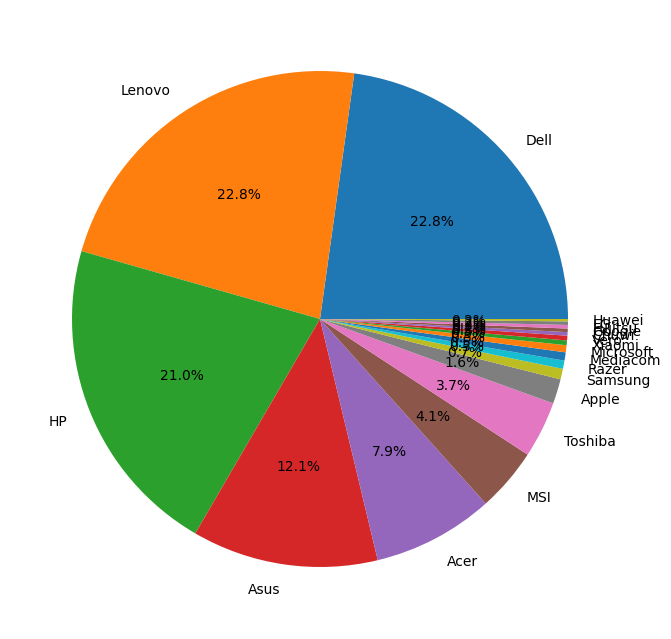

In [135]:
plt.figure(figsize=(8, 10))
plt.pie(
    df["Company"].value_counts().values,
    labels=df["Company"].value_counts().index,
    autopct="%1.1f%%",
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Acer'),
  Text(5, 0, 'MSI'),
  Text(6, 0, 'Toshiba'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Samsung'),
  Text(9, 0, 'Razer'),
  Text(10, 0, 'Mediacom'),
  Text(11, 0, 'Microsoft'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'Vero'),
  Text(14, 0, 'Chuwi'),
  Text(15, 0, 'Google'),
  Text(16, 0, 'Fujitsu'),
  Text(17, 0, 'LG'),
  Text(18, 0, 'Huawei')])

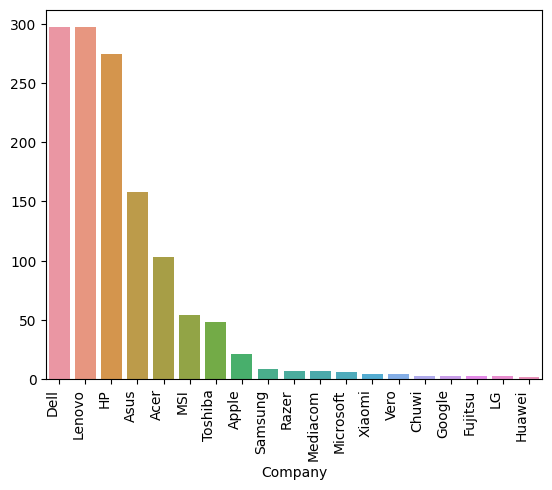

In [136]:
sns.barplot(
    x=df["Company"].value_counts().index, y=df["Company"].value_counts().values, data=df
)


plt.xticks(rotation=90, ha="right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

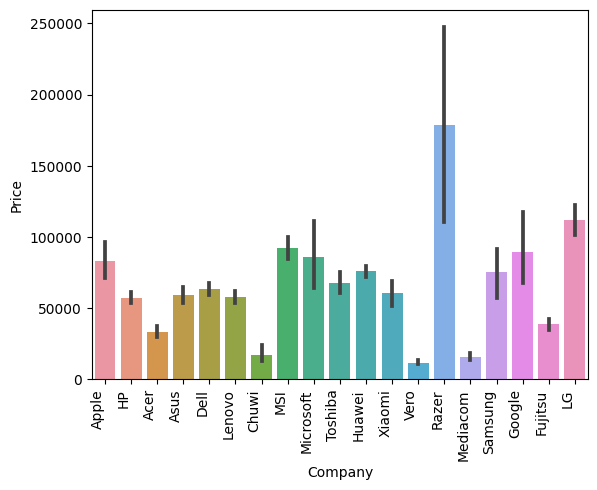

In [137]:
sns.barplot(x=df["Company"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Dell and Lenovo have same no of user


Price is depend upon Company and Most expenssive laptop company is Razer beacuse its make gamming laptop


In [138]:
col_cat[1]

'TypeName'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

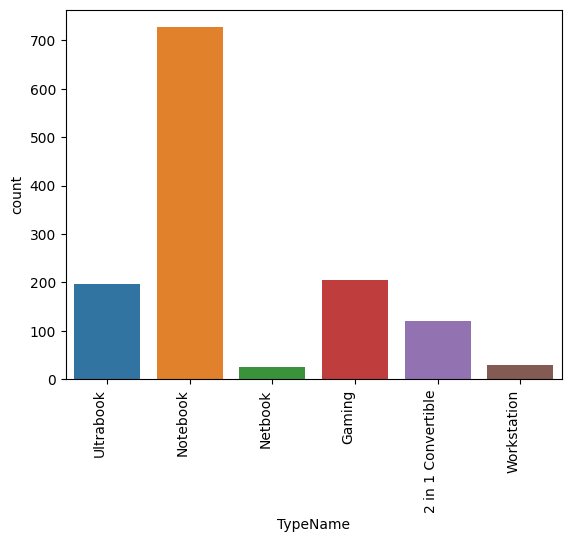

In [139]:
sns.countplot(
    data=df,
    x="TypeName",
)


plt.xticks(rotation=90, ha="right")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

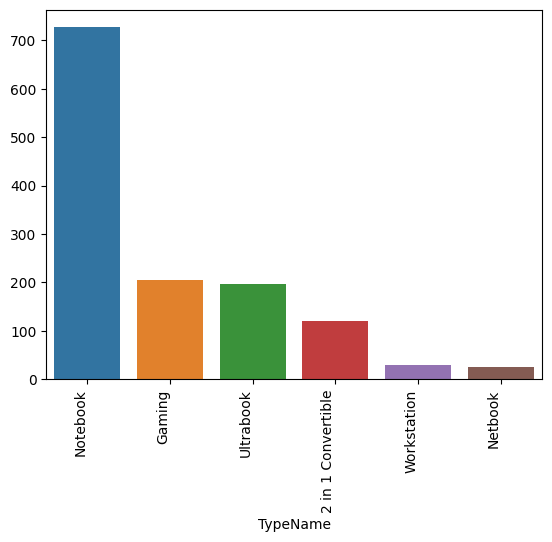

In [140]:
sns.barplot(
    x=df["TypeName"].value_counts().index,
    y=df["TypeName"].value_counts().values,
    data=df,
)


plt.xticks(rotation=90, ha="right")

([<matplotlib.patches.Wedge at 0x205a4e5d950>,
 [Text(-0.19913338424467872, 1.0818252609729824, 'Notebook'),
  Text(-0.7190703524819526, -0.8324288727461828, 'Gaming'),
  Text(0.2767944646492475, -1.0646054782592171, 'Ultrabook'),
  Text(0.9365505560028584, -0.5769515196710527, '2 in 1 Convertible'),
  Text(1.080106380758836, -0.2082551469809297, 'Workstation'),
  Text(1.0980023459253028, -0.0662634766861218, 'Netbook')],
 [Text(-0.10861820958800657, 0.590086505985263, '55.8%'),
  Text(-0.3922201922628832, -0.45405211240700877, '15.7%'),
  Text(0.1509787988995895, -0.5806938972323002, '15.0%'),
  Text(0.5108457578197408, -0.31470082891148327, '9.3%'),
  Text(0.589148934959365, -0.11359371653505256, '2.2%'),
  Text(0.5989103705047105, -0.036143714556066436, '1.9%')])

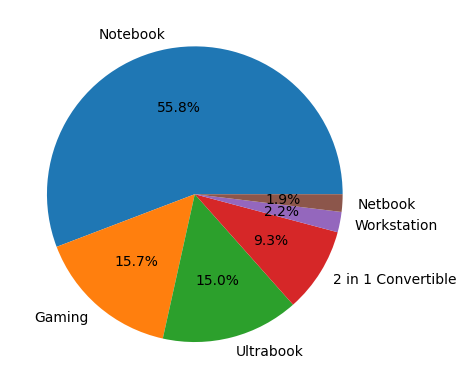

In [141]:
plt.pie(
    df["TypeName"].value_counts().values,
    labels=df["TypeName"].value_counts().index,
    autopct="%1.1f%%",
)

For Our Conclusion of TypeName Col is:

only More no is Notebook than Gaming than Ultrabook than 2 in 1 Covertable than Workstation than Netbook.


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

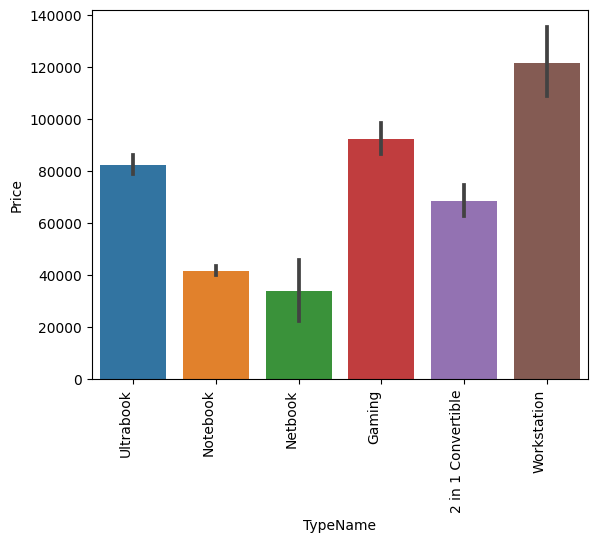

In [142]:
sns.barplot(x=df["TypeName"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Relation is present between TypeName and Target ,beacause price is change is different Typename


In [143]:
col_cat[2]

'ScreenResolution'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Full HD 1920x1080'),
  Text(1, 0, '1366x768'),
  Text(2, 0, 'IPS Panel Full HD 1920x1080'),
  Text(3, 0, 'IPS Panel Full HD / Touchscreen 1920x1080'),
  Text(4, 0, 'Full HD / Touchscreen 1920x1080'),
  Text(5, 0, '1600x900'),
  Text(6, 0, 'Touchscreen 1366x768'),
  Text(7, 0, 'Quad HD+ / Touchscreen 3200x1800'),
  Text(8, 0, 'IPS Panel 4K Ultra HD 3840x2160'),
  Text(9, 0, 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'),
  Text(10, 0, '4K Ultra HD / Touchscreen 3840x2160'),
  Text(11, 0, '4K Ultra HD 3840x2160'),
  Text(12, 0, 'Touchscreen 2560x1440'),
  Text(13, 0, 'IPS Panel 1366x768'),
  Text(14, 0, 'IPS Panel Quad HD+ / Touchscreen 3200x1800'),
  Text(15, 0, 'IPS Panel Retina Display 2560x1600'),
  Text(16, 0, 'IPS Panel Retina Display 2304x1440'),
  Text(17, 0, 'Touchscreen 2256x1504

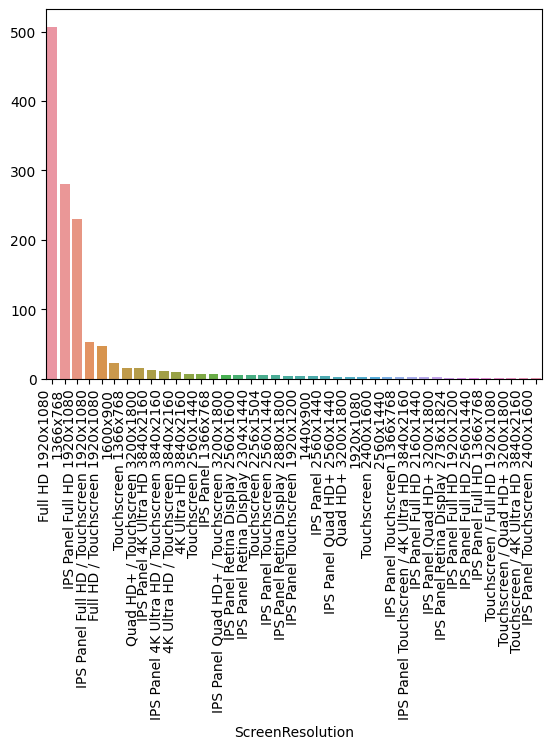

In [144]:
sns.barplot(
    x=df["ScreenResolution"].value_counts().index,
    y=df["ScreenResolution"].value_counts().values,
    data=df,
)


plt.xticks(rotation=90, ha="right")

More No of User use (Full HD 1920 X 1080) Display


(array([0, 1, 2]),
 [Text(0, 0, 'Full HD 1920x1080'),
  Text(1, 0, '1366x768'),
  Text(2, 0, 'IPS Panel Full HD 1920x1080')])

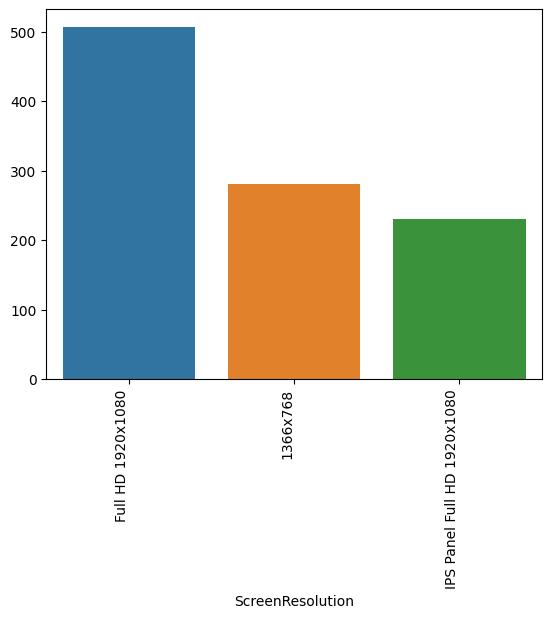

In [145]:
sns.barplot(
    x=df["ScreenResolution"].value_counts().index[:3],
    y=df["ScreenResolution"].value_counts().values[:3],
    data=df,
)


plt.xticks(rotation=90, ha="right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'IPS Panel Retina Display 2560x1600'),
  Text(1, 0, '1440x900'),
  Text(2, 0, 'Full HD 1920x1080'),
  Text(3, 0, 'IPS Panel Retina Display 2880x1800'),
  Text(4, 0, '1366x768'),
  Text(5, 0, 'IPS Panel Full HD 1920x1080'),
  Text(6, 0, 'IPS Panel Retina Display 2304x1440'),
  Text(7, 0, 'IPS Panel Full HD / Touchscreen 1920x1080'),
  Text(8, 0, 'Full HD / Touchscreen 1920x1080'),
  Text(9, 0, 'Touchscreen / Quad HD+ 3200x1800'),
  Text(10, 0, 'IPS Panel Touchscreen 1920x1200'),
  Text(11, 0, 'Touchscreen 2256x1504'),
  Text(12, 0, 'Quad HD+ / Touchscreen 3200x1800'),
  Text(13, 0, 'IPS Panel 1366x768'),
  Text(14, 0, 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'),
  Text(15, 0, 'IPS Panel Full HD 2160x1440'),
  Text(16, 0, '4K Ultra HD / Touchscreen 3840x2160'),
  Text(17, 0, 'Touchscreen

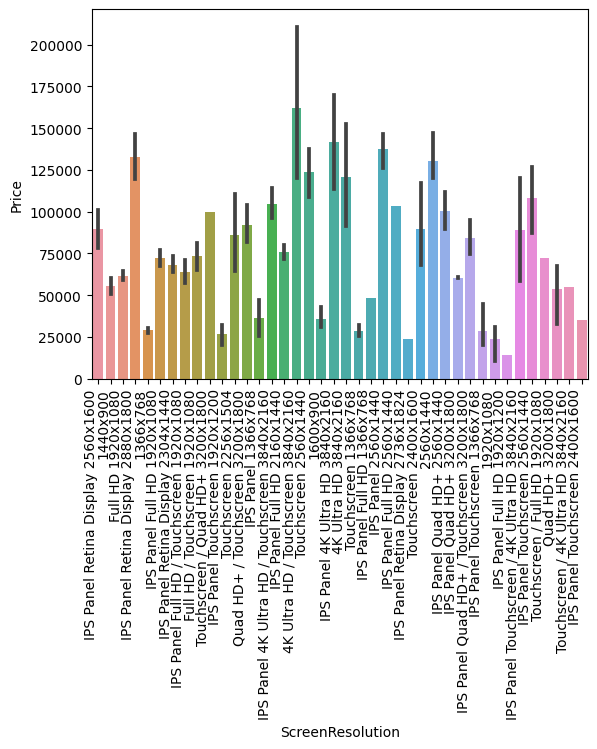

In [146]:
sns.barplot(x=df["ScreenResolution"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Price is also Depend upon ScreenResolution

Price is also Depend upon Screen Size
Price is also Depend upon TouchScreen


In [147]:
col_cat[3]

'Cpu'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Intel Core i5 7200U 2.5GHz'),
  Text(1, 0, 'Intel Core i7 7700HQ 2.8GHz'),
  Text(2, 0, 'Intel Core i7 7500U 2.7GHz'),
  Text(3, 0, 'Intel Core i7 8550U 1.8GHz'),
  Text(4, 0, 'Intel Core i5 8250U 1.6GHz'),
  Text(5, 0, 'Intel Core i5 6200U 2.3GHz'),
  Text(6, 0, 'Intel Core i3 6006U 2GHz'),
  Text(7, 0, 'Intel Core i7 6500U 2.5GHz'),
  Text(8, 0, 'Intel Core i7 6700HQ 2.6GHz'),
  Text(9, 0, 'Intel Core i3 7100U 2.4GHz')])

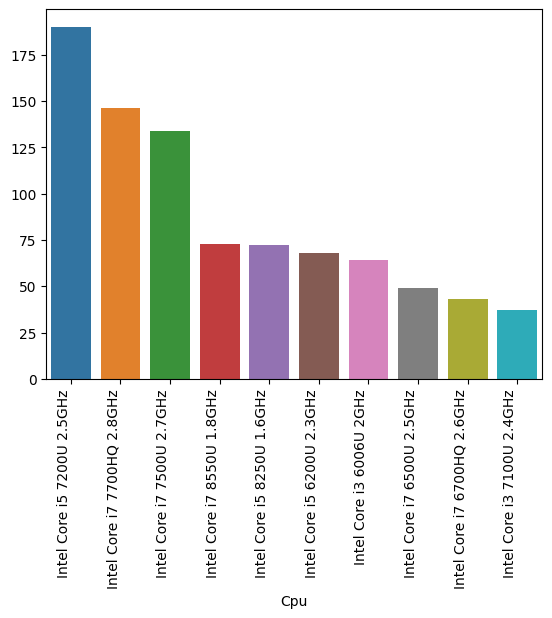

In [148]:
sns.barplot(
    x=df["Cpu"].value_counts().index[:10],
    y=df["Cpu"].value_counts().values[:10],
    data=df,
)


plt.xticks(rotation=90, ha="right")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Intel Core i5 2.3GHz'),
  Text(1, 0, 'Intel Core i5 1.8GHz'),
  Text(2, 0, 'Intel Core i5 7200U 2.5GHz'),
  Text(3, 0, 'Intel Core i7 2.7GHz'),
  Text(4, 0, 'Intel Core i5 3.1GHz'),
  Text(5, 0, 'AMD A9-Series 9420 3GHz'),
  Text(6, 0, 'Intel Core i7 2.2GHz'),
  Text(7, 0, 'Intel Core i7 8550U 1.8GHz'),
  Text(8, 0, 'Intel Core i5 8250U 1.6GHz')])

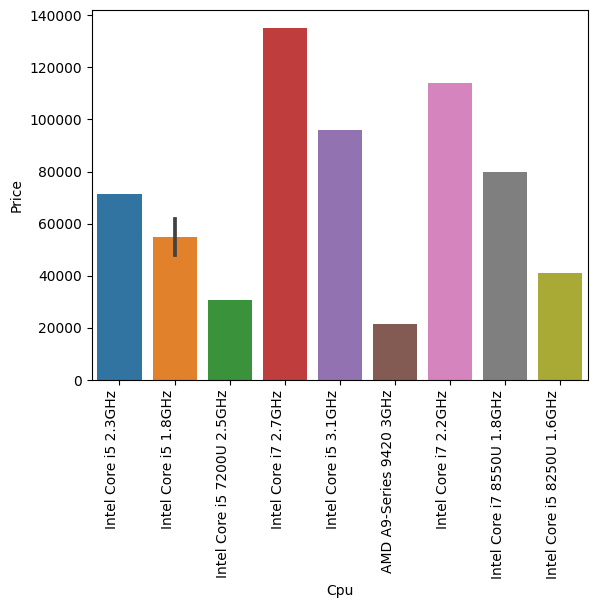

In [149]:
sns.barplot(x=df["Cpu"][:10], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Our Colclusion for Cpu is :

1. Max user is Use intel i5
2. Price is varry on intel i5 and i7, and ect
3. Also price is varry intel to AMD


In [150]:
col_cat[4]

'Ram'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '8GB'),
  Text(1, 0, '4GB'),
  Text(2, 0, '16GB'),
  Text(3, 0, '6GB'),
  Text(4, 0, '12GB'),
  Text(5, 0, '2GB'),
  Text(6, 0, '32GB'),
  Text(7, 0, '24GB'),
  Text(8, 0, '64GB')])

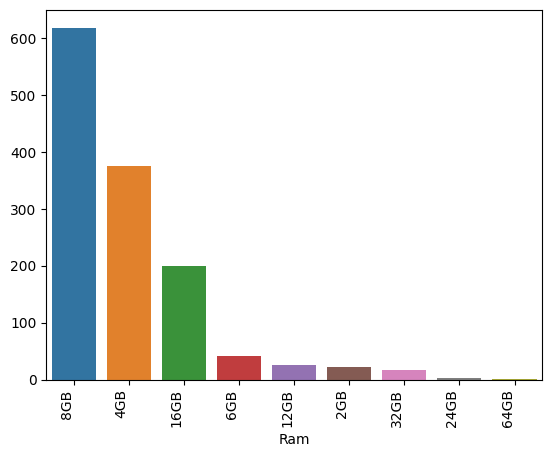

In [151]:
sns.barplot(
    x=df["Ram"].value_counts().index, y=df["Ram"].value_counts().values, data=df
)


plt.xticks(rotation=90, ha="right")

Most User is use 8 GB Ram than 4GB and Least is 64 GB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '8GB'),
  Text(1, 0, '16GB'),
  Text(2, 0, '4GB'),
  Text(3, 0, '2GB'),
  Text(4, 0, '12GB'),
  Text(5, 0, '6GB'),
  Text(6, 0, '32GB'),
  Text(7, 0, '24GB'),
  Text(8, 0, '64GB')])

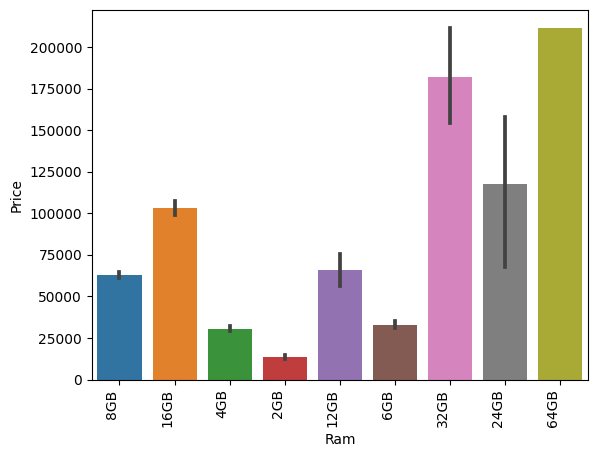

In [152]:
sns.barplot(x=df["Ram"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Ram is also depend on Price


In [153]:
col_cat[5]

'Memory'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '256GB SSD'),
  Text(1, 0, '1TB HDD'),
  Text(2, 0, '500GB HDD'),
  Text(3, 0, '512GB SSD'),
  Text(4, 0, '128GB SSD +  1TB HDD'),
  Text(5, 0, '128GB SSD'),
  Text(6, 0, '256GB SSD +  1TB HDD'),
  Text(7, 0, '32GB Flash Storage'),
  Text(8, 0, '2TB HDD'),
  Text(9, 0, '64GB Flash Storage'),
  Text(10, 0, '512GB SSD +  1TB HDD'),
  Text(11, 0, '1TB SSD'),
  Text(12, 0, '256GB SSD +  2TB HDD'),
  Text(13, 0, '1.0TB Hybrid'),
  Text(14, 0, '256GB Flash Storage'),
  Text(15, 0, '16GB Flash Storage'),
  Text(16, 0, '32GB SSD'),
  Text(17, 0, '180GB SSD'),
  Text(18, 0, '128GB Flash Storage'),
  Text(19, 0, '512GB SSD +  2TB HDD'),
  Text(20, 0, '16GB SSD'),
  Text(21, 0, '512GB Flash Storage'),
  Text(22, 0, '1TB SSD +  1TB HDD'),
  Text(23, 0, '256GB SSD +  500GB HDD'),
  Text(24, 0, '128GB SSD + 

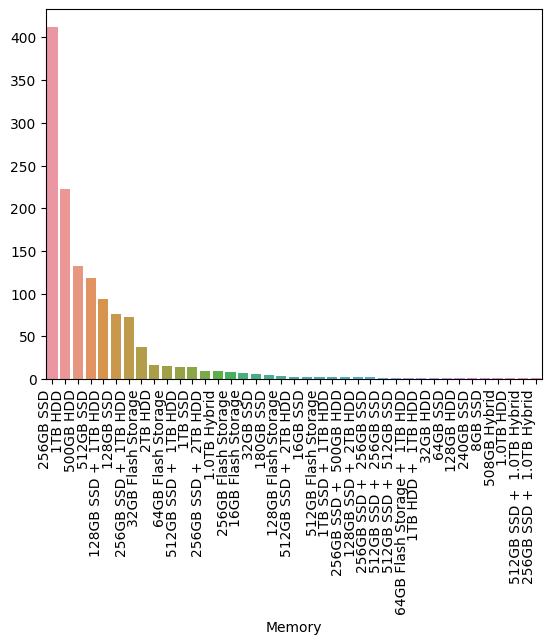

In [154]:
sns.barplot(
    x=df["Memory"].value_counts().index, y=df["Memory"].value_counts().values, data=df
)


plt.xticks(rotation=90, ha="right")

Most user is use 256GB SSD


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '128GB SSD'),
  Text(1, 0, '128GB Flash Storage'),
  Text(2, 0, '256GB SSD'),
  Text(3, 0, '512GB SSD'),
  Text(4, 0, '500GB HDD'),
  Text(5, 0, '256GB Flash Storage'),
  Text(6, 0, '1TB HDD'),
  Text(7, 0, '32GB Flash Storage'),
  Text(8, 0, '128GB SSD +  1TB HDD'),
  Text(9, 0, '256GB SSD +  256GB SSD'),
  Text(10, 0, '64GB Flash Storage'),
  Text(11, 0, '256GB SSD +  1TB HDD'),
  Text(12, 0, '256GB SSD +  2TB HDD'),
  Text(13, 0, '32GB SSD'),
  Text(14, 0, '2TB HDD'),
  Text(15, 0, '64GB SSD'),
  Text(16, 0, '1.0TB Hybrid'),
  Text(17, 0, '512GB SSD +  1TB HDD'),
  Text(18, 0, '1TB SSD'),
  Text(19, 0, '256GB SSD +  500GB HDD'),
  Text(20, 0, '128GB SSD +  2TB HDD'),
  Text(21, 0, '512GB SSD +  512GB SSD'),
  Text(22, 0, '16GB SSD'),
  Text(23, 0, '16GB Flash Storage'),
  Text(24, 0, '512GB 

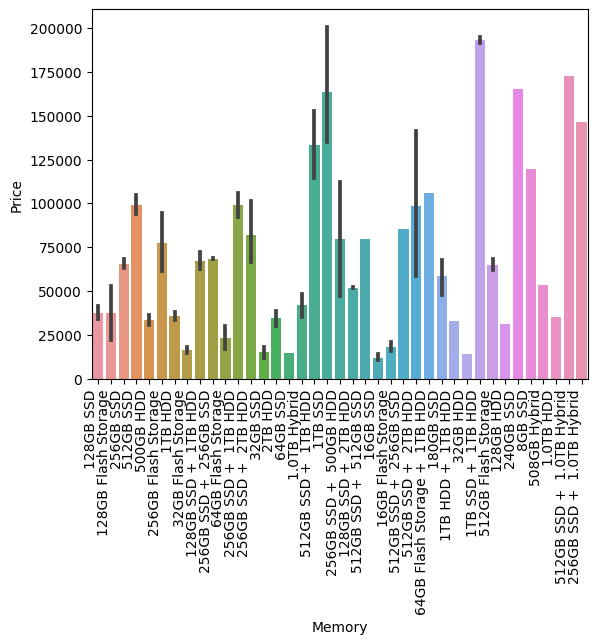

In [155]:
sns.barplot(x=df["Memory"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

price is depend upon Memory Size and Type also


In [156]:
col_cat[6]

'Gpu'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 [Text(0, 0, 'Intel HD Graphics 620'),
  Text(1, 0, 'Intel HD Graphics 520'),
  Text(2, 0, 'Intel UHD Graphics 620'),
  Text(3, 0, 'Nvidia GeForce GTX 1050'),
  Text(4, 0, 'Nvidia GeForce GTX 1060'),
  Text(5, 0, 'Nvidia GeForce 940MX'),
  Text(6, 0, 'AMD Radeon 530'),
  Text(7, 0, 'Intel HD Graphics 500'),
  Text(8, 0, 'Intel HD Graphics 400'),
  Text(9, 0, 'Nvidia GeForce

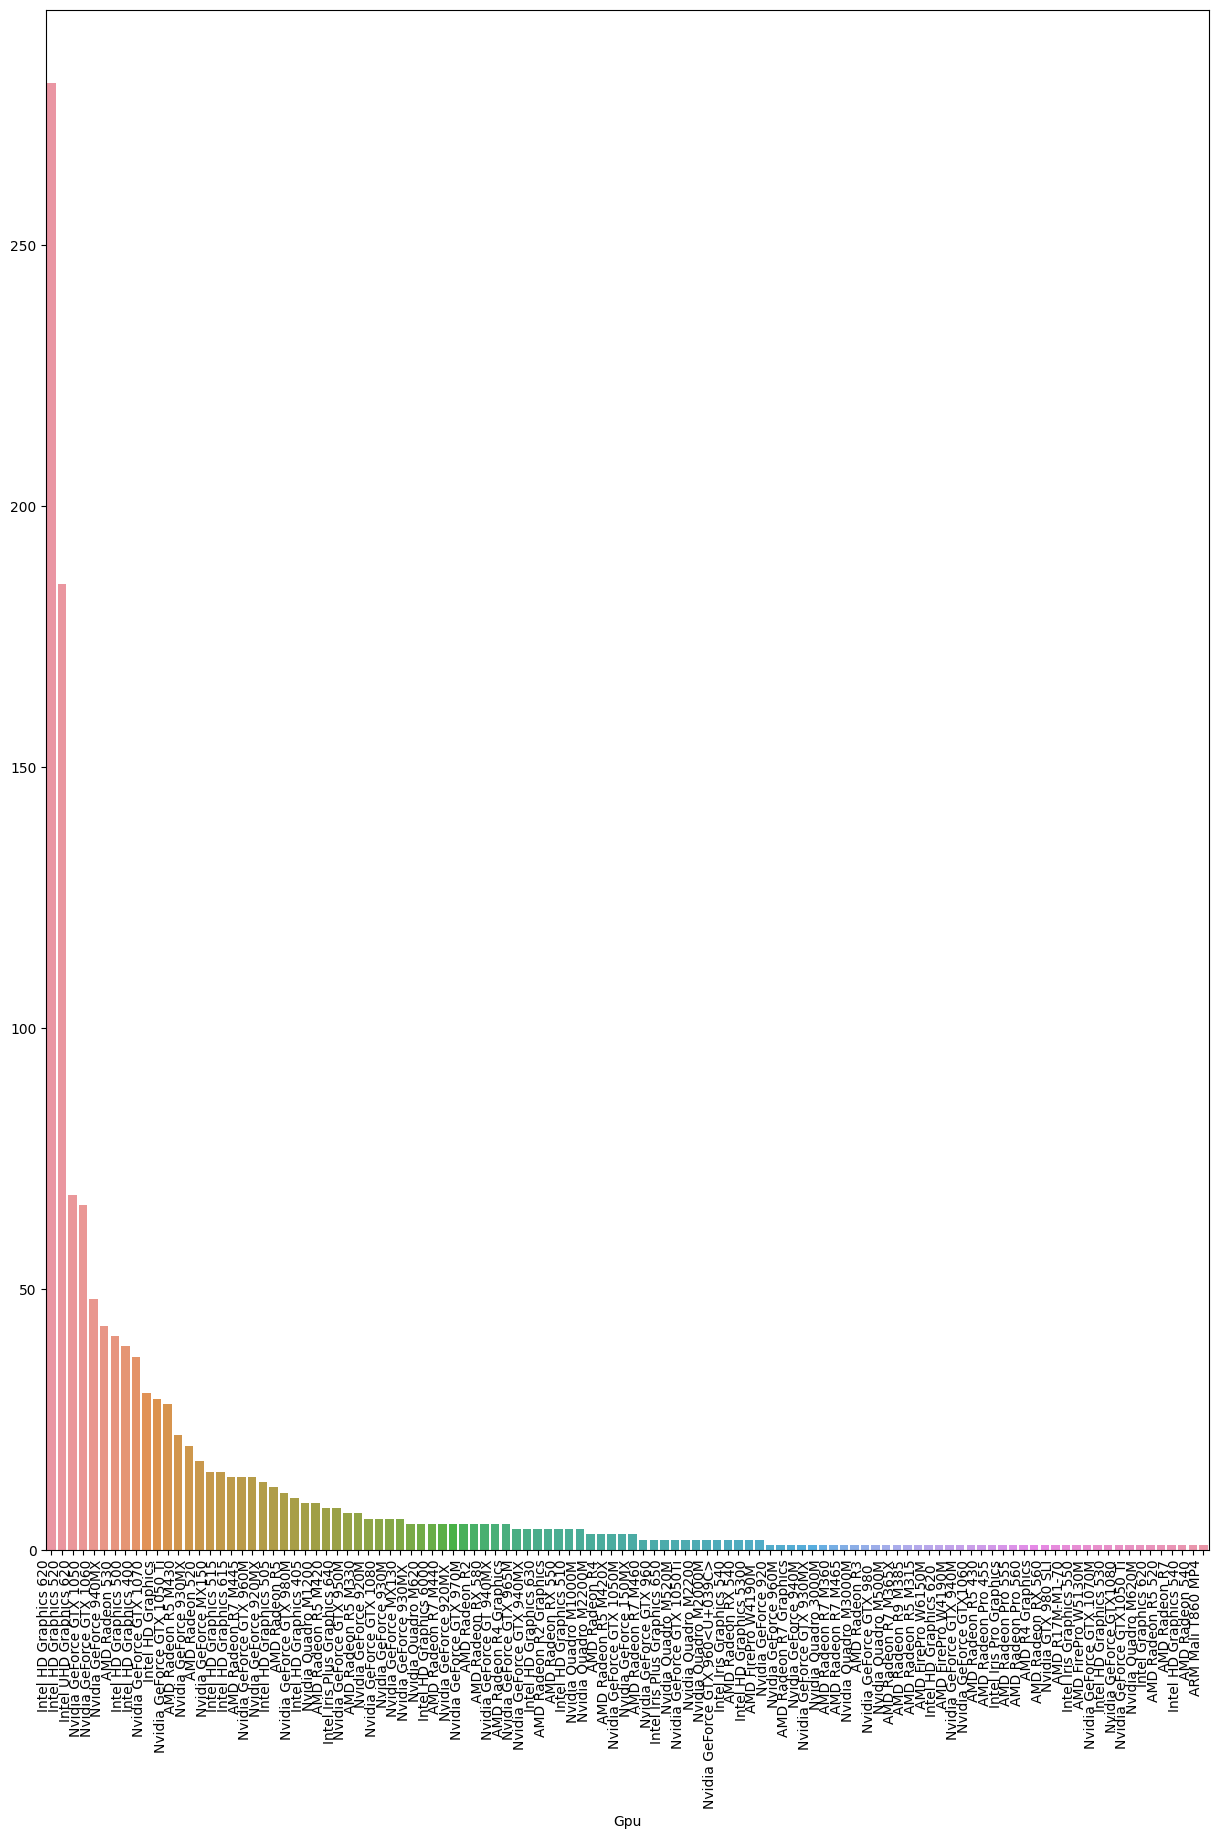

In [157]:
plt.figure(figsize=(15, 20))
sns.barplot(
    x=df["Gpu"].value_counts().index, y=df["Gpu"].value_counts().values, data=df
)
plt.xticks(rotation=90, ha="right")

Some commmon Gpu is intel beacause is default but Nvidia is 4th, and AMD is also use


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 [Text(0, 0, 'Intel Iris Plus Graphics 640'),
  Text(1, 0, 'Intel HD Graphics 6000'),
  Text(2, 0, 'Intel HD Graphics 620'),
  Text(3, 0, 'AMD Radeon Pro 455'),
  Text(4, 0, 'Intel Iris Plus Graphics 650'),
  Text(5, 0, 'AMD Radeon R5'),
  Text(6, 0, 'Intel Iris Pro Graphics'),
  Text(7, 0, 'Nvidia GeForce MX150'),
  Text(8, 0, 'Intel UHD Graphics 620'),
  Text(9, 0, 'Intel

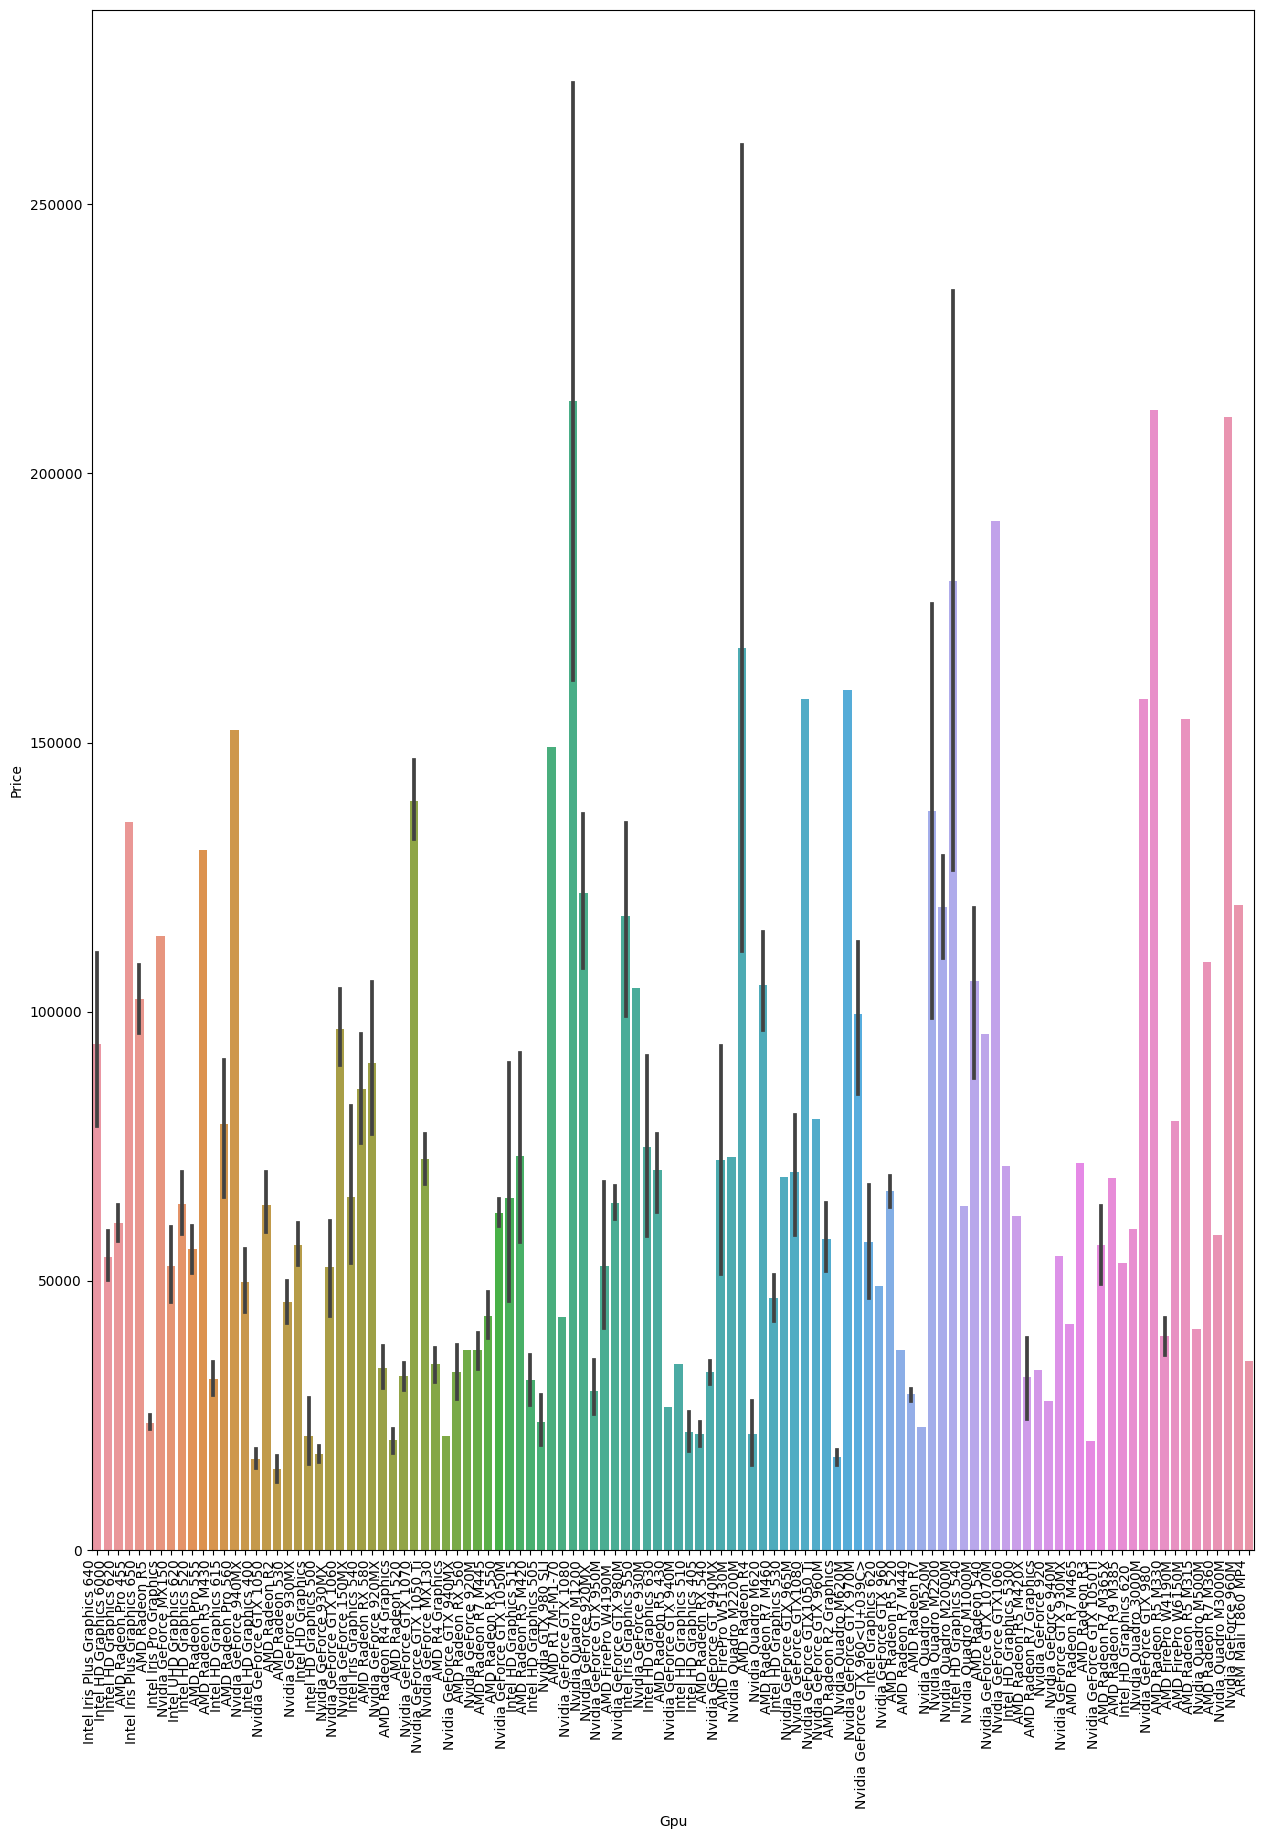

In [158]:
plt.figure(figsize=(15, 20))
sns.barplot(x=df["Gpu"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Price is also Depend upon GPU Brand and its Config


In [159]:
col_cat[7]

'OpSys'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Windows 10'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Windows 7'),
  Text(4, 0, 'Chrome OS'),
  Text(5, 0, 'macOS'),
  Text(6, 0, 'Mac OS X'),
  Text(7, 0, 'Windows 10 S'),
  Text(8, 0, 'Android')])

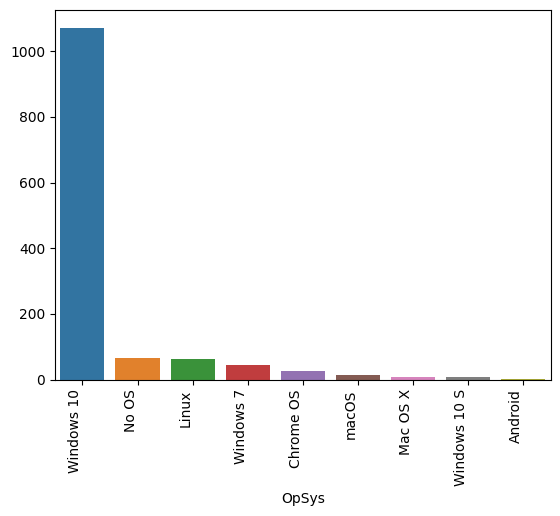

In [160]:
sns.barplot(
    x=df["OpSys"].value_counts().index, y=df["OpSys"].value_counts().values, data=df
)


plt.xticks(rotation=90, ha="right")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

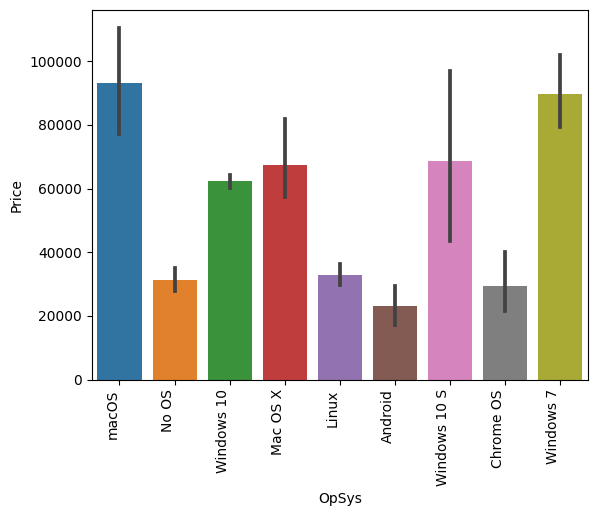

In [161]:
sns.barplot(x=df["OpSys"], y=df["Price"], data=df)
plt.xticks(rotation=90, ha="right")

Most Common user is Window and Price is High of macos than window


In [162]:
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

<Axes: xlabel='Weight', ylabel='Count'>

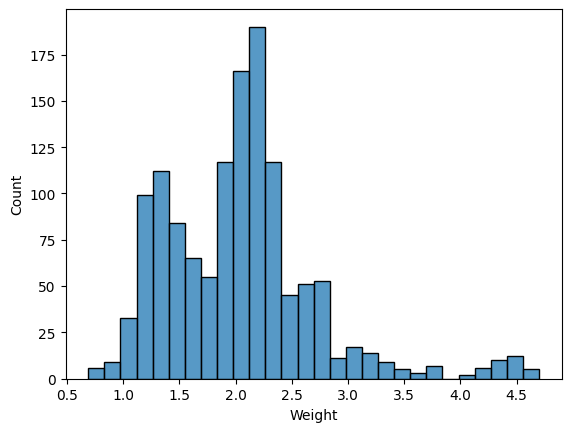

In [163]:
sns.histplot(df["Weight"])

most laptop is belog to 2.0-2.5 kg


<Axes: xlabel='Weight', ylabel='Price'>

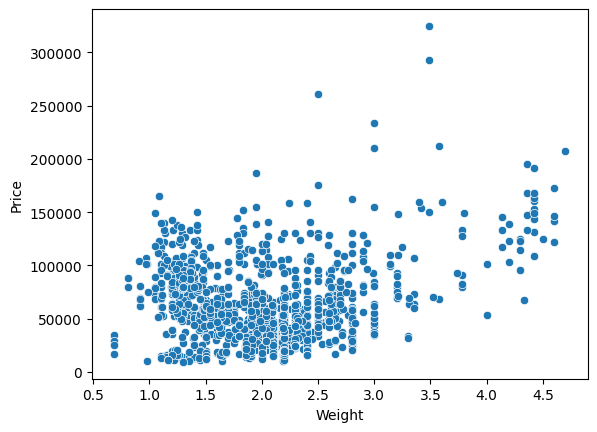

In [164]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

Weight is less depend but low weight have more price


<Axes: xlabel='Inches', ylabel='Count'>

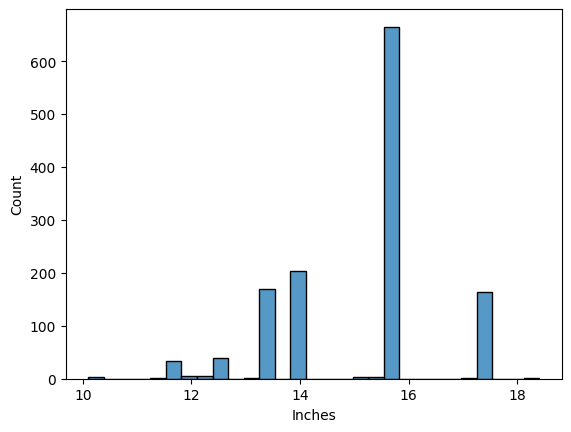

In [165]:
sns.histplot(df["Inches"])

most laptop lie between is 15-16 inches


<Axes: xlabel='Inches', ylabel='Price'>

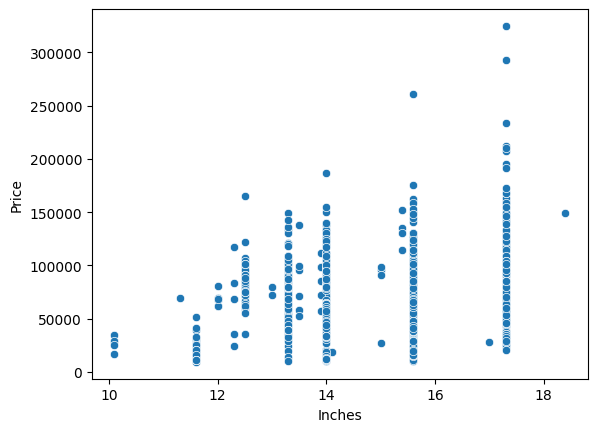

In [166]:
sns.scatterplot(x=df["Inches"], y=df["Price"])

screen size is depend if size is increse than price is high


Most Common Laptop for our conclusion

Brand: Lenovo & Dell<br>
Type: Notebook.<br>
Processor: Intel i5.<br>
RAM: 8GB.<br>
Storage: 256GB SSD.<br>
GPU: Integrated Intel GPU.<br>
Display: Full HD (1920 x 1080).<br>
Operating System: Windows.<br>
Weight: Approximately 2.0 kg.<br>
Screen Size: 15.6 inches


All Feature are perform sepcific role on price, so i not drop any col. and i perform Feature engineering for making a new feature to the given feature


In [167]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [168]:
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

In [169]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


I make three new col for SSD , HDD and Flash Storage then i put its respective value


In [171]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [172]:
# Initialize columns
df["Flash"] = 0
df["SSD"] = 0
df["HDD"] = 0
df["Hybrid"] = 0

In [173]:
x = 0

In [174]:
def memory_seprate(text):
    # print(text)
    global x
    # print(x)
    lst = text.split()
    if "Flash" in lst:
        i = lst.index("Flash")
        i = i - 1
        text2 = lst[i]
        numeric_part, non_numeric_part = text2[:-2], text2[-2:]
        if "GB" == non_numeric_part:
            # print(float(numeric_part))
            df["Flash"][x] = float(numeric_part)
        if "TB" == non_numeric_part:
            # print(float(numeric_part)*1000)
            df["Flash"][x] = float(numeric_part) * 1000
    if "SSD" in lst:
        i = lst.index("SSD")
        i = i - 1
        text2 = lst[i]
        numeric_part, non_numeric_part = text2[:-2], text2[-2:]
        if "GB" == non_numeric_part:
            # print(float(numeric_part))
            df["SSD"][x] = float(numeric_part)
        if "TB" == non_numeric_part:
            # print(float(numeric_part)*1000)
            df["SSD"][x] = float(numeric_part) * 1000

    if "HDD" in lst:
        i = lst.index("HDD")
        i = i - 1
        text2 = lst[i]
        numeric_part, non_numeric_part = text2[:-2], text2[-2:]
        if "GB" == non_numeric_part:
            # print(float(numeric_part))
            df["HDD"][x] = float(numeric_part)
        if "TB" == non_numeric_part:
            # print(float(numeric_part)*1000)
            df["HDD"][x] = float(numeric_part) * 1000

    if "Hybrid" in lst:
        i = lst.index("Hybrid")
        i = i - 1
        text2 = lst[i]
        numeric_part, non_numeric_part = text2[:-2], text2[-2:]
        if "GB" == non_numeric_part:
            # print(float(numeric_part))
            df["Hybrid"][x] = float(numeric_part)
        if "TB" == non_numeric_part:
            # print(float(numeric_part)*1000)
            df["Hybrid"][x] = float(numeric_part) * 1000

    x += 1

In [175]:
df["Memory"].apply(memory_seprate)

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: Memory, Length: 1303, dtype: object

In [176]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Flash,SSD,HDD,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0


In [177]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Flash,SSD,HDD,Hybrid
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2,61751.5200,64,0,0,0
969,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.4,37029.6000,0,256,0,0
42,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.3,27864.9072,0,0,1000,0
210,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4,41505.1200,0,0,1000,0
671,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,1.9,43580.3760,0,128,1000,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Flash             1303 non-null   int64  
 12  SSD               1303 non-null   int64  
 13  HDD               1303 non-null   int64  
 14  Hybrid            1303 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 147.7+ KB


In [179]:
df.drop(columns=["Memory"], inplace=True)

In [180]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Flash,SSD,HDD,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0


In [181]:
print(df["SSD"].corr(df["Price"]))
print(df["HDD"].corr(df["Price"]))
print(df["Flash"].corr(df["Price"]))
print(df["Hybrid"].corr(df["Price"]))

0.6762024092737859
-0.09567170265145293
-0.040511154076927715
0.007989384746104717


In [182]:
df.drop(columns=["Flash", "Hybrid"], inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [184]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [185]:
df.shape[0]

1303

In [186]:
for i in range(df.shape[0]):
    if (
        "Intel Core i5" in df["Cpu"][i]
        or "Intel Core i3" in df["Cpu"][i]
        or "Intel Core i7" in df["Cpu"][i]
    ):
        lst = df["Cpu"][i].split()
        s = " ".join(lst[:3])
        df["Cpu"][i] = s
    elif "AMD" in df["Cpu"][i]:
        df["Cpu"][i] = "AMD"
    else:
        df["Cpu"][i] = "Other"

In [187]:
df["Cpu"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'Other'],
      dtype=object)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [189]:
for i in range(df.shape[0]):
    lst = df["Gpu"][i].split()
    df["Gpu"][i] = lst[0]

In [190]:
df["Gpu"].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [192]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [193]:
for i in range(df.shape[0]):
    s = df["OpSys"][i].split()
    if "Windows" in s:
        df["OpSys"][i] = "Windows"
        # print(s,"Window")
    elif "Mac" in s or "macOS" in s:
        df["OpSys"][i] = "Mac"
        # print(s,"Mac")
    else:
        df["OpSys"][i] = "Other"
        # print(s,"Other")

In [194]:
df["OpSys"].unique()

array(['Mac', 'Other', 'Windows'], dtype=object)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [196]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [197]:
df["IPS"] = 0
df["Touchscreen"] = 0

In [198]:
for i in range(df.shape[0]):
    lst = df["ScreenResolution"][i].lower().split()
    if "ips" in lst:
        df["IPS"][i] = 1
    else:
        df["IPS"][i] = 0
    if "touchscreen" in lst:
        df["Touchscreen"][i] = 1
    else:
        df["Touchscreen"][i] = 0

In [199]:
import re

In [200]:
df['X_pixel']=0
df['y_pixel']=0

In [201]:
for i in range(df.shape[0]):
    lst = re.findall(r"(\d+)x(\d+)", df["ScreenResolution"][i])
    for j in lst:
            df['X_pixel'][i]=int(j[0])
            df['y_pixel'][i]=int(j[1])

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Touchscreen       1303 non-null   int64  
 14  X_pixel           1303 non-null   int64  
 15  y_pixel           1303 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(

In [203]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,IPS,Touchscreen,X_pixel,y_pixel
70,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5,4,Intel,Windows,1.252,58021.92,128,0,0,1,2256,1504
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7,16,Nvidia,Windows,1.300,79653.60,512,0,0,0,1920,1080
397,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5,8,Intel,Windows,1.900,49976.64,256,0,1,0,1920,1080
657,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7,16,AMD,Windows,2.200,60472.80,256,2000,0,0,1920,1080
299,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7,16,Nvidia,Windows,1.630,78215.04,512,0,0,0,1920,1080


In [204]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   float64
 9   SSD          1303 non-null   int64  
 10  HDD          1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  Touchscreen  1303 non-null   int64  
 13  X_pixel      1303 non-null   int64  
 14  y_pixel      1303 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 147.7+ KB


Here's the full equation for PPI:<br>
ppi = (√(w²+h²))/d<br>
Where:<br>
ppi: is pixels per inch<br>
w: is the width resolution in pixels<br>
h: is the height resolution in pixels<br>
d: is the diagonal size of the screen in inches<br>

In [206]:
df['ppi']=0

In [207]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,IPS,Touchscreen,X_pixel,y_pixel,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,Mac,1.37,71378.6832,128,0,1,0,2560,1600,0


In [208]:
for i in range(df.shape[0]):
    ppi=round((np.sqrt((df['X_pixel'][i]**2)+(df['y_pixel'][i]**2)))/df['Inches'][i],3)
    df['ppi'][i]=ppi

In [209]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,IPS,Touchscreen,X_pixel,y_pixel,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,Mac,1.37,71378.6832,128,0,1,0,2560,1600,226.983
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,Mac,1.34,47895.5232,0,0,0,0,1440,900,127.678
2,HP,Notebook,15.6,Intel Core i5,8,Intel,Other,1.86,30636.0000,256,0,0,0,1920,1080,141.212
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,Mac,1.83,135195.3360,512,0,1,0,2880,1800,220.535
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,Mac,1.37,96095.8080,256,0,1,0,2560,1600,226.983


In [210]:
df.drop(columns=['Inches','X_pixel','y_pixel'],inplace=True)

In [211]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'SSD', 'HDD', 'IPS', 'Touchscreen', 'ppi'],
      dtype='object')

In [212]:
df.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,IPS,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.37,71378.6832,128,0,1,0,226.983


In [213]:
for col in df.columns:
    print(df[str(col)].value_counts())
    print("______________________________")

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
______________________________
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
______________________________
Cpu
Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: count, dtype: int64
______________________________
Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64
______________________________
Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, 

In [214]:
df=df[df['Gpu']!="ARM"]

In [215]:
df.shape

(1302, 13)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Cpu          1302 non-null   object 
 3   Ram          1302 non-null   int32  
 4   Gpu          1302 non-null   object 
 5   OpSys        1302 non-null   object 
 6   Weight       1302 non-null   float64
 7   Price        1302 non-null   float64
 8   SSD          1302 non-null   int64  
 9   HDD          1302 non-null   int64  
 10  IPS          1302 non-null   int64  
 11  Touchscreen  1302 non-null   int64  
 12  ppi          1302 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [217]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']

In [218]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True,dtype=int)

In [219]:
df_encoded.head()

,Ram,Weight,Price,SSD,HDD,IPS,Touchscreen,ppi,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_Intel Core i3,Cpu_Intel Core i5,Cpu_Intel Core i7,Cpu_Other,Gpu_Intel,Gpu_Nvidia,OpSys_Other,OpSys_Windows
0,8,1.37,71378.6832,128,0,1,0,226.983,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,47895.5232,0,0,0,0,127.678,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,30636.0000,256,0,0,0,141.212,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.3360,512,0,1,0,220.535,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,96095.8080,256,0,1,0,226.983,1,0,...,1,0,0,1,0,0,1,0,0,0


In [220]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ram                   1302 non-null   int32  
 1   Weight                1302 non-null   float64
 2   Price                 1302 non-null   float64
 3   SSD                   1302 non-null   int64  
 4   HDD                   1302 non-null   int64  
 5   IPS                   1302 non-null   int64  
 6   Touchscreen           1302 non-null   int64  
 7   ppi                   1302 non-null   float64
 8   Company_Apple         1302 non-null   int32  
 9   Company_Asus          1302 non-null   int32  
 10  Company_Chuwi         1302 non-null   int32  
 11  Company_Dell          1302 non-null   int32  
 12  Company_Fujitsu       1302 non-null   int32  
 13  Company_Google        1302 non-null   int32  
 14  Company_HP            1302 non-null   int32  
 15  Company_Huawei        1302

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X = df_encoded.drop('Price', axis=1)
y = np.log(df_encoded['Price'])

In [223]:
X

,Ram,Weight,SSD,HDD,IPS,Touchscreen,ppi,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_Intel Core i3,Cpu_Intel Core i5,Cpu_Intel Core i7,Cpu_Other,Gpu_Intel,Gpu_Nvidia,OpSys_Other,OpSys_Windows
0,8,1.37,128,0,1,0,226.983,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,0,0,127.678,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,256,0,0,0,141.212,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,512,0,1,0,220.535,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,256,0,1,0,226.983,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,128,0,1,1,157.351,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1299,16,1.30,512,0,1,1,276.054,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1300,2,1.50,0,0,0,0,111.935,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1301,6,2.19,0,1000,0,0,100.455,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [224]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [226]:
model=[]
r2_l=[]
mae_l=[]

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_absolute_error

In [228]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("R-squared:", r2)
print('MAE',mae)
model.append("LinearRegression")
r2_l.append(r2)
mae_l.append(mae)

R-squared: 0.8078591480332653
MAE 0.209642760483979


In [229]:
from sklearn.neighbors import KNeighborsRegressor

In [230]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
model.append("KNeighborsRegressor")
r2_l.append(r2)
mae_l.append(mae)

R-squared: 0.804859324569823
Mean Absolute Error: 0.19341149792647702


In [231]:
from sklearn.tree import DecisionTreeRegressor

In [232]:
dt_model = DecisionTreeRegressor(max_depth=8)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
model.append("DecisionTreeRegressor")
r2_l.append(r2)
mae_l.append(mae)

R-squared: 0.8447648568261075
Mean Absolute Error: 0.18077727331041904


In [233]:
from sklearn.svm import SVR

In [234]:
svr_model = SVR(kernel='rbf',C=10000,epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
model.append("SVR")
r2_l.append(r2)
mae_l.append(mae)

R-squared: 0.8185822517943968
Mean Absolute Error: 0.19762392455819108


In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
model.append("RandomForestRegressor")
r2_l.append(r2)
mae_l.append(mae)

R-squared: 0.8857062515042079
Mean Absolute Error: 0.15542255941456723


In [237]:
for i,j,k in zip(model,r2_l,mae_l):
    print(f"| Model Name: {i} | R2 Score: {round(j,3)} | Mean Absolute error: {round(k,3)} |")

| Model Name: LinearRegression | R2 Score: 0.808 | Mean Absolute error: 0.21 |
| Model Name: KNeighborsRegressor | R2 Score: 0.805 | Mean Absolute error: 0.193 |
| Model Name: DecisionTreeRegressor | R2 Score: 0.845 | Mean Absolute error: 0.181 |
| Model Name: SVR | R2 Score: 0.819 | Mean Absolute error: 0.198 |
| Model Name: RandomForestRegressor | R2 Score: 0.886 | Mean Absolute error: 0.155 |


RandomForestRegressor Perform Well

In [238]:
import pickle

In [239]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_model,open('model.pkl','wb'))